In [1]:
!pip uninstall tensorflow -y
!pip uninstall keras -y
!pip install keras==2.9.0
!pip install tensorflow==2.9.0

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0
Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Successfully uninstalled keras-2.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 40.3 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
  

In [4]:
!pwd
!unzip Ship.zip

/content
Archive:  Ship.zip
   creating: Test/
   creating: Test/battle ship/
  inflating: Test/battle ship/t1.jpg  
  inflating: Test/battle ship/t2.jpg  
 extracting: Test/battle ship/t3.jpg  
  inflating: Test/battle ship/t4.jpg  
 extracting: Test/battle ship/t5.webp  
 extracting: Test/battle ship/t6.webp  
   creating: Test/patrol ship/
  inflating: Test/patrol ship/p1.jpg  
  inflating: Test/patrol ship/p2.jpg  
  inflating: Test/patrol ship/p3.jpg  
  inflating: Test/patrol ship/p4.jpg  
  inflating: Test/patrol ship/p5.jpg  
 extracting: Test/patrol ship/p6.jpg  
   creating: Test/submarine/
  inflating: Test/submarine/s1.jpg   
  inflating: Test/submarine/s2.jpg   
  inflating: Test/submarine/s3.jpg   
  inflating: Test/submarine/s4.jpg   
  inflating: Test/submarine/s5.jpg   
   creating: Train/
   creating: Train/battleship/
  inflating: Train/battleship/b1.jpg  
 extracting: Train/battleship/b10.webp  
 extracting: Train/battleship/b11.webp  
 extracting: Train/battleship/

In [9]:
!ls

sample_data  Ship.zip  Test  Train  Validate


In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import keras.utils as to_categorical
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D,GlobalAveragePooling2D

from sklearn.metrics import confusion_matrix, classification_report
from skimage.transform import rescale

#Load base model
base_model = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

#Add new layer
x = base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) # dense layer 1
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
pred=Dense(3,activation='softmax')(x)

#Assign transfer base model + new layers to model
model = Model(inputs=base_model.input, outputs=pred)
model.summary()

#Assign Trainable layers and freeze layer
for layer in model.layers[:86]:
    layer.trainable=False
for layer in model.layers[86:]:
    layer.trainable=True

for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<ipython-input-18-c4b507bd5f01>:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 1.0995 - accuracy: 0.3563

9/9 [==============================] - 11s 1s/step - loss: 1.0995 - accuracy: 0.3563 - val_loss: 0.8056 - val_accuracy: 0.7681
Epoch 2/100
9/9 [==============================] - 6s 634ms/step - loss: 0.7507 - accuracy: 0.7471
Epoch 3/100
9/9 [==============================] - 5s 491ms/step - loss: 0.5781 - accuracy: 0.8046
Epoch 4/100
9/9 [==============================] - 8s 893ms/step - loss: 0.4691 - accuracy: 0.8851
Epoch 5/100
9/9 [==============================] - 6s 662ms/step - loss: 0.3473 - accuracy: 0.8736
Epoch 6/100
9/9 [==============================] - 5s 480ms/step - loss: 0.3200 - accuracy: 0.8966
Epoch 7/100
9/9 [==============================] - 7s 777ms/step - loss: 0.3742 - accuracy: 0.8506
Epoch 8/100
9/9 [==============================] - 4s 493ms/step - loss: 0.3200 - accuracy: 0.8736
Epoch 9/100
9/9 [==============================] - 7s 772ms/step - loss: 0.2633 - accuracy: 0.9080
Epoch 10/100
9/9 [==============================] - 4s 475ms/step - loss: 0.2403 

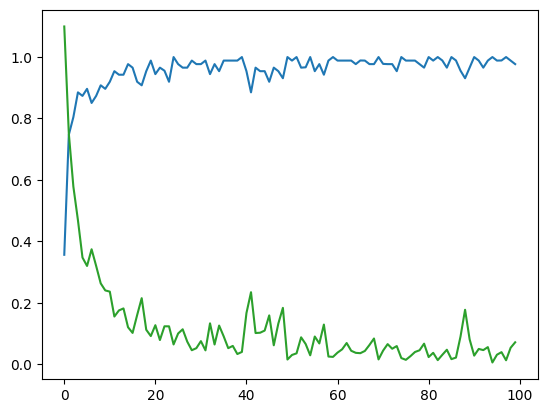

In [18]:
#Create DataGenerator Object
datagen = ImageDataGenerator(
    rotation_range=50, zoom_range=0.5,
    width_shift_range=0.2, height_shift_range=0.3,
    shear_range=0.6, horizontal_flip=0.5,
    preprocessing_function=preprocess_input,
    fill_mode="nearest"
)

#Create Train Image generator
train_generator = datagen.flow_from_directory(
    './Train/',target_size=(224,224),color_mode='rgb',
    batch_size=10,
    class_mode='categorical',seed=42,shuffle=True
)

#Create Validation Image generator
val_generator = datagen.flow_from_directory(
    './Validate/',target_size=(224,224),color_mode='rgb',
    batch_size=10,
    class_mode='categorical',seed=42,shuffle=True
)

# batch = train_generator.next()
# Img_train = rescale(batch[0])
# plt.imshow(batch[0])

#Create optimizer
opts = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

#Define training Generator Param
Ep = 100 #num of iters
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size

history = model.fit_generator(generator=train_generator,
epochs=Ep, steps_per_epoch = step_size_train,
validation_data=val_generator,validation_steps=step_size_train,
verbose=1)

#Perform Visualization
plt.plot(history.history["accuracy"],label="Train_acc")
#plt.plot(history.history["val_accuracy"],label="Validate_acc")

#View Loss
plt.plot(history.history["loss"],label="Train_loss")
#plt.plot(history.history["val_loss"],label="Validate_loss")

In [19]:
#Initial test gen
test_generator = datagen.flow_from_directory(
    './Test/',target_size=(224,224),color_mode='rgb',
    batch_size=1,
    class_mode='categorical',shuffle=False
)

y_true = test_generator.classes

preds = model.predict_generator(test_generator)
print(preds.shape)
print(preds)

y_pred = np.argmax(preds,axis=1)
print(test_generator.classes)
print(y_pred)

#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true=y_true,y_pred=y_pred))
print(classification_report(y_true=y_true,y_pred=y_pred))

Found 15 images belonging to 3 classes.


<ipython-input-19-bda68746db87>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


(15, 3)
[[9.9998879e-01 1.0638912e-05 5.6332465e-07]
 [9.9463993e-01 5.3376756e-03 2.2463377e-05]
 [9.5528871e-01 4.4665974e-02 4.5339759e-05]
 [9.9878520e-01 5.3951755e-04 6.7532959e-04]
 [9.6452600e-01 3.5440966e-02 3.2975964e-05]
 [3.5437968e-04 2.7815500e-01 7.2149056e-01]
 [1.0507529e-02 9.8781234e-01 1.6801209e-03]
 [2.4863688e-04 9.9958390e-01 1.6746775e-04]
 [9.5911037e-06 9.9984598e-01 1.4449748e-04]
 [5.2954326e-04 9.8668784e-01 1.2782565e-02]
 [1.0385786e-04 4.8348319e-08 9.9989605e-01]
 [7.0123971e-03 8.8770798e-04 9.9209982e-01]
 [6.4031936e-02 4.5730397e-01 4.7866413e-01]
 [9.6287692e-01 2.5257706e-03 3.4597278e-02]
 [5.2550869e-05 9.5873482e-05 9.9985158e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 2 1 1 1 1 2 2 2 0 2]
[[4 0 0]
 [1 4 1]
 [1 0 4]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6
           2       0.80      0.80      0.80         5

    ac